In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Mining_Prj/phase_1/GooglePlay.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10841.0,5420.000000,3129.671468,0.0,2710.0,5420.0,8130.0,10840.0
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [ ]:
# Unnamed: 0, App, Category, Rating, Reviews, Size, Installs, Type, Price,
# Content Rating, Genres, Last Updated, Current Ver, Android Ver
df = df.drop(columns='Unnamed: 0')
df = df.drop(df.index[10472])

for col in ['Reviews',	'Size',	'Installs',	'Price']:
  # extract numbers
  df[col] = df[col].str.extract('(\d+)')

  # cast as int
  df[col] = df[col].dropna().astype('int')

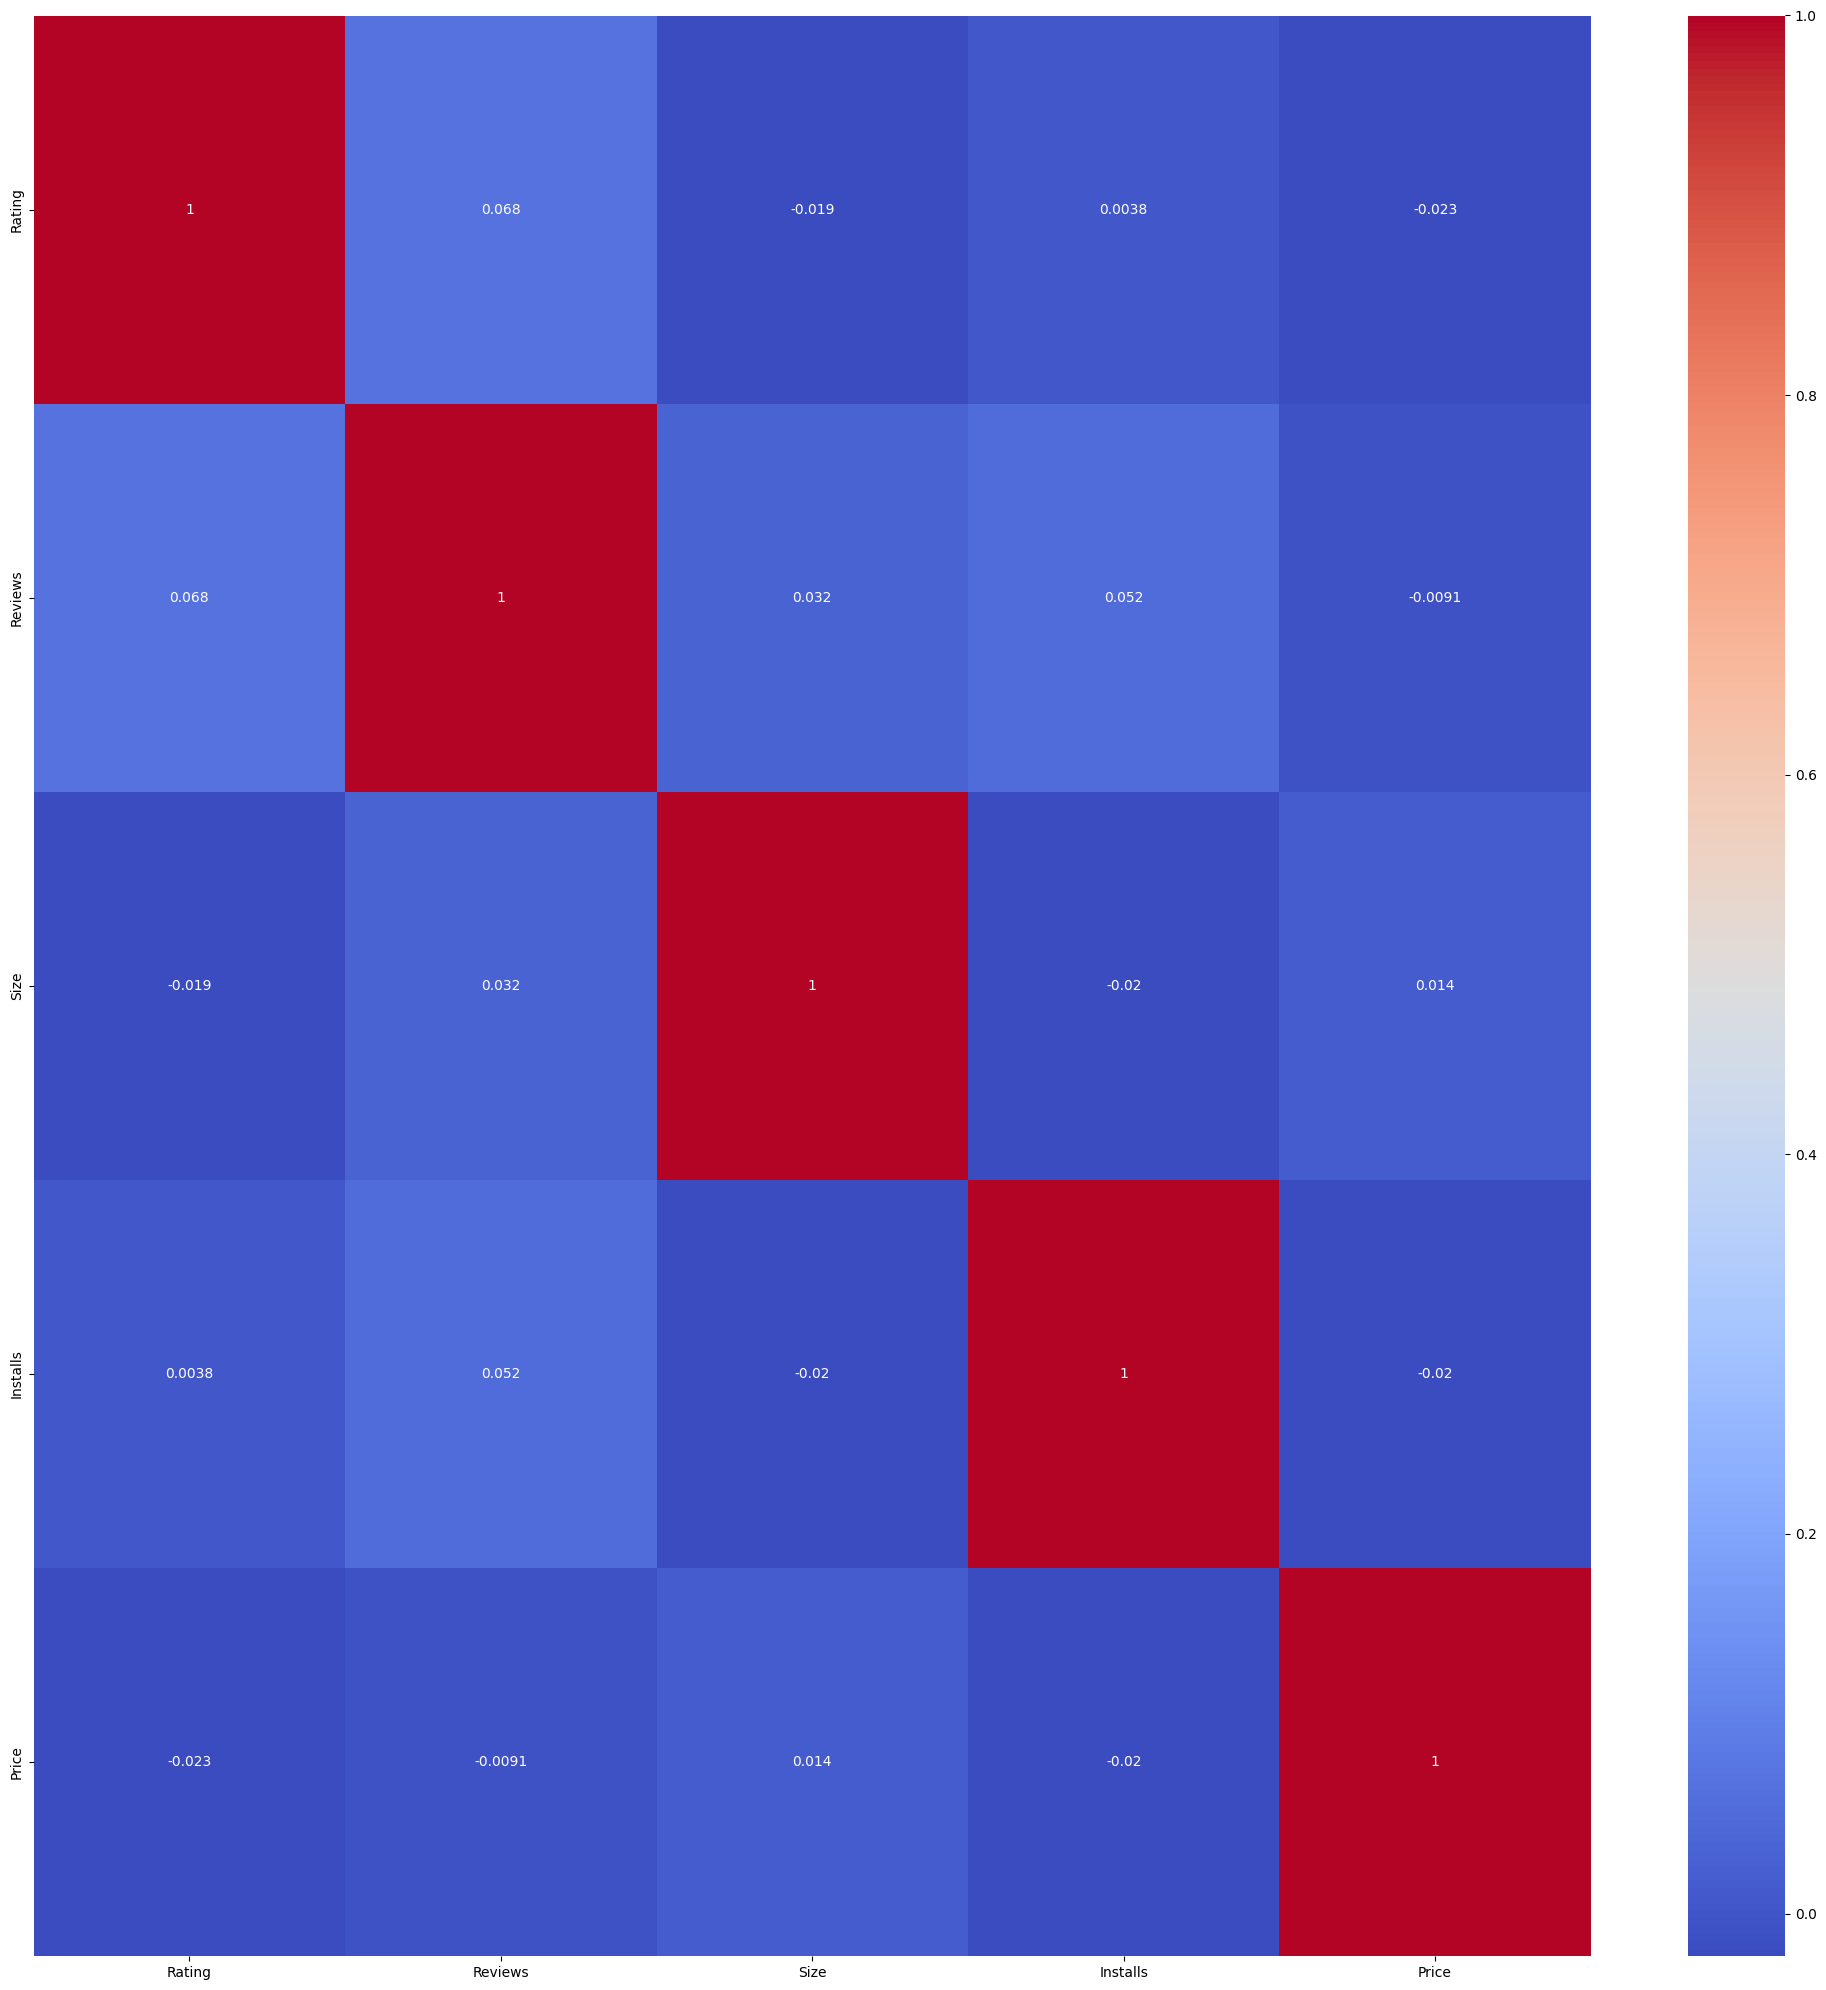

In [ ]:
numeric_vals = df.select_dtypes(include=['number'])
numeric_corr = numeric_vals.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

## Part 1 - Knowing the dataset

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.0,5,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.0,100,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [ ]:
def analyze_dataset(dataset):
    results = []
    Nominal = ['App', 'Category', 'Genres']
    Ordinal = ['Content Rating', 'Last Updated', 'Current Ver', 'Android Ver']

    for column_name, column_data in dataset.items():
        # Initialize variables
        range_val = None
        min_val = None
        max_val = None
        mean_val = None
        mode = None
        median_val = None
        outliers = None

        # Basic information
        data_type = column_data.dtype.name
        unique_values = column_data.unique()
        unique_count = len(unique_values)

        if any(column_name == i for i in Nominal):
            data_type = "Nominal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif any(column_name == i for i in Ordinal):
            data_type = "Ordinal"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        elif column_name == "Type":
            data_type  = "Binary"
            value_counts = column_data.value_counts()
            mode = value_counts.idxmax()

        else:
            # Numeric column
            data_type = "Numeric"
            range_val = column_data.max() - column_data.min()
            min_val = column_data.min()
            max_val = column_data.max()
            mean_val = column_data.mean()
            mode = df[column_name].mode()[0]
            median_val = column_data.median()

            # Outliers
            data_std = df[column_name].std()
            q1 = df[column_name].quantile(0.25)
            q3 = df[column_name].quantile(0.75)
            iqr = q3 - q1
            outliers = df[(df[column_name] < q1 - 1.5*iqr) | (df[column_name] > q3 + 1.5*iqr)][column_name].tolist()

        # Save results for this column
        results.append({
            "Name": column_name,
            "Type": data_type,
            "Range": range_val,
            "Min": min_val,
            "Max": max_val,
            "Mean": mean_val,
            "Mode": mode,
            "Median": median_val,
            "Outlier": outliers
        })

    # Create a new DataFrame with the results
    df_results = pd.DataFrame(results)

    return df_results

In [ ]:
analyze_dataset(df)

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier
0,App,Nominal,NaN,NaN,NaN,NaN,ROBLOX,NaN,None
1,Category,Nominal,NaN,NaN,NaN,NaN,FAMILY,NaN,None
2,Rating,Numeric,4.0,1.0,5.0,4.191757,4.4,4.3,"[3.2, 3.2, 3.1, 3.2, 3.2, 2.6, 3.1, 3.0, 1.9, ..."
3,Reviews,Numeric,78158306.0,0.0,78158306.0,444152.896033,0,2094.0,"[215644, 194216, 224399, 295221, 174531, 27192..."
4,Size,Numeric,1019.0,1.0,1020.0,36.857846,3.0,15.0,"[201.0, 79.0, 118.0, 695.0, 84.0, 97.0, 556.0,..."
5,Installs,Numeric,500.0,0.0,500.0,72.411070,10,10.0,"[500, 500, 500, 500, 500, 500, 500, 500, 500, ..."
6,Type,Binary,NaN,NaN,NaN,NaN,Free,NaN,None
7,Price,Numeric,400.0,0.0,400.0,0.961808,0,0.0,"[4, 4, 4, 4, 3, 3, 6, 1, 2, 3, 7, 3, 3, 5, 3, ..."
8,Content Rating,Ordinal,NaN,NaN,NaN,NaN,Everyone,NaN,None
9,Genres,Nominal,NaN,NaN,NaN,NaN,Tools,NaN,None


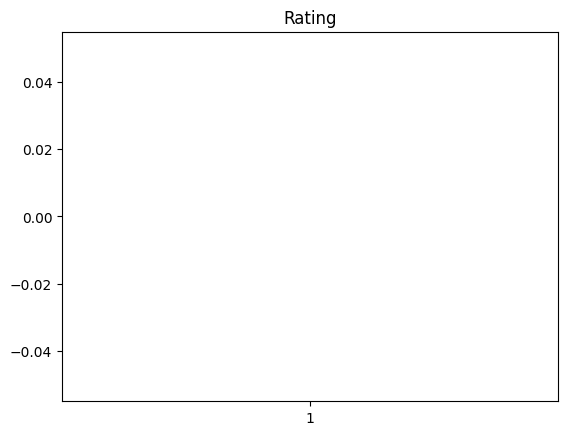

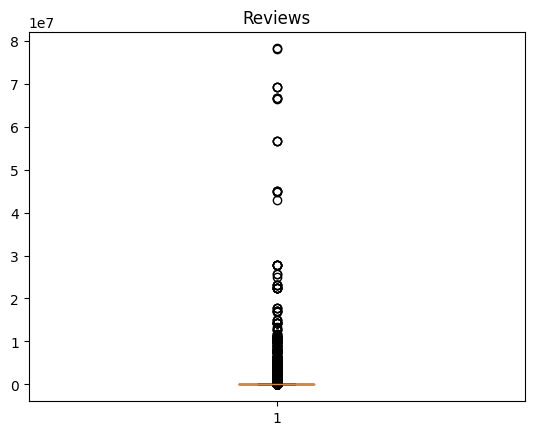

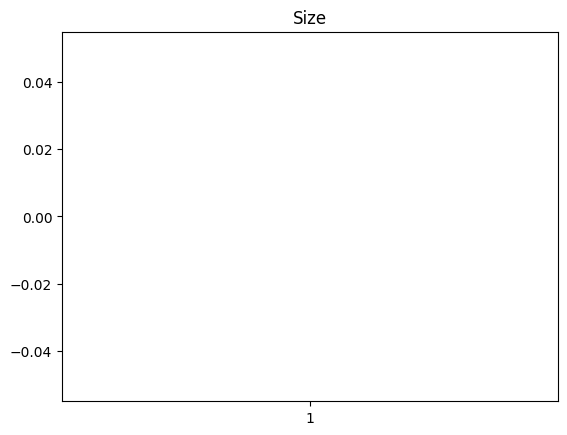

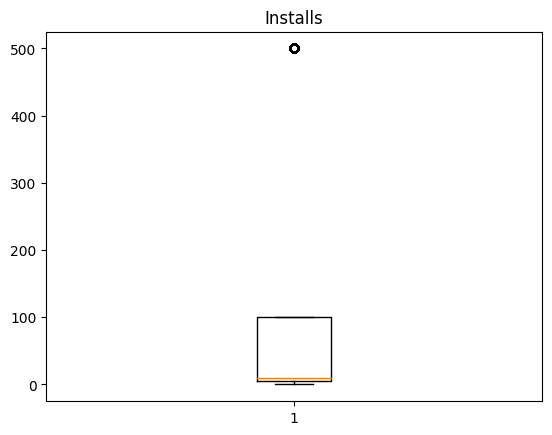

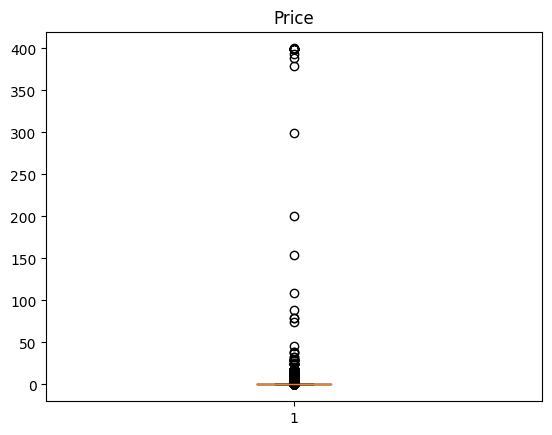

In [ ]:
# numeric = ["Size", ]
numeric = df.select_dtypes(include=['number']).columns
for feature in numeric:
    # Create a box plot
    plt.boxplot(df[feature])
    # Add a title
    plt.title(feature)
    # Show the plot
    plt.show()

In [ ]:
analyze_dataset(df)

,Name,Type,Range,Min,Max,Mean,Mode,Median,Outlier
0,Patient ID,Nominal,NaN,NaN,NaN,NaN,BMW7812,NaN,None
1,Age,Numeric,72.000000,18.000000,90.000000,53.707977,90,54.000000,[]
2,Sex,Nominal,NaN,NaN,NaN,NaN,Male,NaN,None
3,Cholesterol,Numeric,280.000000,120.000000,400.000000,259.877211,235,259.000000,[]
4,Blood Pressure,Nominal,NaN,NaN,NaN,NaN,146/94,NaN,None
5,Heart Rate,Numeric,70.000000,40.000000,110.000000,75.021682,94,75.000000,[]
6,Diabetes,Binary,NaN,NaN,NaN,NaN,None,NaN,None
7,Family History,Binary,NaN,NaN,NaN,NaN,None,NaN,None
8,Smoking,Binary,NaN,NaN,NaN,NaN,None,NaN,None
9,Obesity,Binary,NaN,NaN,NaN,NaN,None,NaN,None


## Part 2 - Data Evaluation

### Creditability

In [ ]:
# Numeric
expected_ranges = {
    'Age': (0, 150),
    'Cholesterol': (0, 500),
    'Heart Rate': (0, 300),
    'BMI': (0, 100),
    'Triglycerides': (0, 1000),
    'Exercise Hours Per Week': (0, 168),
    'Sedentary Hours Per Day': (0, 24),
    'Physical Activity Days Per Week': (0, 7),
    'Sleep Hours Per Day': (0, 24)
}

for feature, (min_value, max_value) in expected_ranges.items():

    valid_data = df[(df[feature] >= min_value) & (df[feature] <= max_value)]
    creditability_percentage = (len(valid_data) / len(df)) * 100

    print(f"The percentage of creditability for '{feature}' is: {creditability_percentage}%")

The percentage of creditability for 'Age' is: 100.0%
The percentage of creditability for 'Cholesterol' is: 100.0%
The percentage of creditability for 'Heart Rate' is: 100.0%
The percentage of creditability for 'BMI' is: 100.0%
The percentage of creditability for 'Triglycerides' is: 100.0%
The percentage of creditability for 'Exercise Hours Per Week' is: 100.0%
The percentage of creditability for 'Sedentary Hours Per Day' is: 100.0%
The percentage of creditability for 'Physical Activity Days Per Week' is: 100.0%
The percentage of creditability for 'Sleep Hours Per Day' is: 100.0%


In [ ]:
# Nominal
print(df["Continent"].unique())
print(df["Country"].unique())
print(df["Hemisphere"].unique())
print(df["Diet"].unique())
print(df["Sex"].unique())

['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']
['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam' 'China' 'Italy' 'Spain' 'India'
 'Nigeria' 'New Zealand' 'South Korea' 'Australia' 'Colombia'
 'United Kingdom']
['Southern Hemisphere' 'Northern Hemisphere']
['Average' 'Unhealthy' 'Healthy']
['Male' 'Female']
Uniqeueness Voilation: 0


In [ ]:
# Uniqeueness Voilation
print("Uniqeueness Voilation:", len(df) - len(df["Patient ID"].unique()) )

Uniqeueness Voilation: 0


### ‫‪Consistency‬‬

In [ ]:
continent_to_countries = {
    "South America": ["Argentina", "Brazil", "Colombia", "Ecuador", "Peru", "Venezuela"],
    "North America": ["Canada", "Mexico", "United States"],
    "Europe": ["France", "Germany", "Italy", "Spain", "United Kingdom"],
    "Asia": ["China", "India", "Japan", "South Korea", "Vietnam", "Thailand"],
    "Africa": ["Nigeria", "South Africa", "Egypt"],
    "Australia": ["Australia", "New Zealand"],
}

hemisphere_to_countries = {
    "Northern Hemisphere": ["Canada", "Mexico", "United States", "Thailand","France", "Germany", "Italy", "Spain", "United Kingdom", "China", "India", "Japan", "South Korea", "Vietnam", "Nigeria", "South Africa", "Egypt", "Australia", "New Zealand", "Colombia"],
    "Southern Hemisphere": ["Argentina", "Brazil", "Colombia", "Ecuador", "Peru", "Venezuela", "Chile", "Argentina", "Uruguay", "Paraguay", "New Zealand"],
}
for record in df.iterrows():
    country = record[1]["Country"]
    continent = record[1]["Continent"]

    if country not in continent_to_countries[continent]:
        print(f"Inconsistency: {country} is not in {continent}")
amount = 0
dic = {"Northern Hemisphere": [],
       "Southern Hemisphere": []}
for record in df.iterrows():
    country = record[1]["Country"]
    hemisphere = record[1]["Hemisphere"]

    if country not in hemisphere_to_countries[hemisphere]:
        # print(f"Inconsistency: {country} is not in {hemisphere}")

        if country not in dic[hemisphere]:
            dic[hemisphere].append(country)
        amount += 1
print(dic)
print("Inconsistency: ", amount, "records")

{'Northern Hemisphere': [], 'Southern Hemisphere': ['South Africa', 'Italy', 'Spain', 'Australia']}
Inconsistency:  1735 records


In [ ]:
high_bmi_threshold = 30
low_cholesterol_threshold = 150
high_sedentary_hours_threshold = 10
regular_exercise_threshold = 14

# Identify patients with high BMI and low cholesterol
high_bmi_low_cholesterol = df[(df["BMI"] > high_bmi_threshold) &
                                 (df["Cholesterol"] < low_cholesterol_threshold)]

# Identify patients with high sedentary hours and regular exercise
high_sedentary_regular_exercise = df[(df["Sedentary Hours Per Day"] > high_sedentary_hours_threshold) &
                                         (df["Exercise Hours Per Week"] >= regular_exercise_threshold)]

print("Patients with high BMI and low cholesterol:")
print(high_bmi_low_cholesterol['Patient ID'])
print("\n")

print("Patients with high sedentary hours and regular exercise:")
print(high_sedentary_regular_exercise['Patient ID'])

Patients with high BMI and low cholesterol:
8       XCQ5937
15      DCY3282
39      GNK9443
66      GVI1884
73      ICO9779
         ...   
8598    RKF5108
8615    AMA5018
8640    DDQ2406
8657    YKK4476
8748    GQZ5013
Name: Patient ID, Length: 387, dtype: object


Patients with high sedentary hours and regular exercise:
8       XCQ5937
12      FPS0415
14      VTW9069
15      DCY3282
45      ENZ9640
         ...   
8671    NEO8325
8698    AZD1747
8727    JAW8302
8741    NTL8842
8744    VXA0409
Name: Patient ID, Length: 448, dtype: object


In [ ]:
high_bmi_threshold = 30

# Identify patients with Patients with BMI more than 30 and not obese or BMI less than 30 and obese
inconsistents = df[((df["BMI"] > high_bmi_threshold) & (~df["Obesity"])) |
                  ((df["BMI"] < high_bmi_threshold) &  df["Obesity"])]



print("Patients with BMI more than 30 and not obese or BMI less than 30 and obese:")
print(inconsistents['Patient ID'])


Patients with BMI more than 30 and not obese or BMI less than 30 and obese:
0       BMW7812
1       CZE1114
3       JLN3497
4       GFO8847
7       XXM0972
         ...   
8751    SVO4635
8753    NVC8704
8755    KQR8949
8759    QSV6764
8762    ZWN9666
Name: Patient ID, Length: 4465, dtype: object


## Part 3 - Preprocessing

In [ ]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### It seems like our dataset is already free of missing values, so there's no need to perform any missing value handling.

In [ ]:

Triglycerides_norm = (df["Triglycerides"] - df["Triglycerides"].min(axis=0)) / (df["Triglycerides"].max(axis=0) - df["Triglycerides"].min(axis=0))
df['Triglycerides'] = Triglycerides_norm
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,0.332468,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,0.266234,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,0.723377,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,0.451948,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
BMI_norm = (df["BMI"] - np.mean(df["BMI"])) / np.std(df["BMI"])
df["BMI"] = BMI_norm
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
HeartRate_norm = (df["Heart Rate"] - np.mean(df["Heart Rate"])) / np.std(df["Heart Rate"])
df["Heart Rate"] = HeartRate_norm
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,-0.147042,0,0,1,0,...,6.615001,261404,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,1.118179,1,1,1,1,...,4.963459,285768,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,-0.147042,1,0,0,0,...,9.463426,235282,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,-0.098380,1,1,1,0,...,7.648981,125640,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,0.874867,1,1,1,1,...,1.514821,160555,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
scaler = StandardScaler()
df[['Age', 'Cholesterol']] = scaler.fit_transform(df[['Age', 'Cholesterol']])
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,0.625557,Male,-0.641579,158/88,-0.147042,0,0,1,0,...,6.615001,261404,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,-1.539322,Male,1.596895,165/93,1.118179,1,1,1,1,...,4.963459,285768,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,-1.539322,Female,0.793023,174/99,-0.147042,1,0,0,0,...,9.463426,235282,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,1.425621,Male,1.522691,163/100,-0.098380,1,1,1,0,...,7.648981,125640,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,0.578495,Male,0.718820,91/88,0.874867,1,1,1,1,...,1.514821,160555,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,0.625557,Male,-0.641579,158/88,-0.147042,0,0,1,0,...,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,-1.539322,Male,1.596895,165/93,1.118179,1,1,1,1,...,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,-1.539322,Female,0.793023,174/99,-0.147042,1,0,0,0,...,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,1.425621,Male,1.522691,163/100,-0.098380,1,1,1,0,...,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,0.578495,Male,0.718820,91/88,0.874867,1,1,1,1,...,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [ ]:
bp = []
for i in df['Blood Pressure']:
    a=i.split('/')[0]
    b=i.split('/')[1]
    bp.append(float(a)/float(b))
df['Blood Pressure']=pd.Series(bp)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,0.625557,Male,-0.641579,1.795455,-0.147042,0,0,1,0,...,0.373454,0.332468,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,-1.539322,Male,1.596895,1.774194,1.118179,1,1,1,1,...,-0.268479,0.266234,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,-1.539322,Female,0.793023,1.757576,-0.147042,1,0,0,0,...,-0.113134,0.723377,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,1.425621,Male,1.522691,1.630000,-0.098380,1,1,1,0,...,1.198524,0.451948,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,0.578495,Male,0.718820,1.034091,0.874867,1,1,1,1,...,-1.120826,0.261039,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


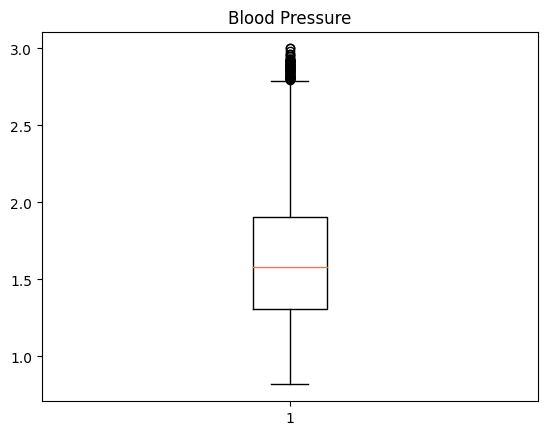

In [ ]:
plt.boxplot(df['Blood Pressure'])
    # Add a title
plt.title('Blood Pressure')
# Show the plot
plt.show()

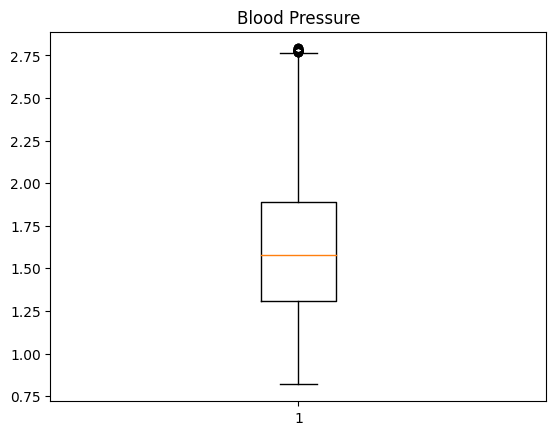

In [ ]:
Q1 = df['Blood Pressure'].quantile(0.25)
Q3 = df['Blood Pressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Blood Pressure'] >= lower_bound) & (df['Blood Pressure'] <= upper_bound)]
plt.boxplot(df['Blood Pressure'])
plt.title('Blood Pressure')
plt.show()

In [ ]:
df=df.drop(['Blood Pressure', 'Country', 'Continent', 'Hemisphere'], axis=1)
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,BMW7812,67,Male,208,72,0,0,1,0,0,...,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,CZE1114,21,Male,389,98,1,1,1,1,1,...,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,BNI9906,21,Female,324,72,1,0,0,0,0,...,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,JLN3497,84,Male,383,73,1,1,1,0,1,...,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,GFO8847,66,Male,318,93,1,1,1,1,0,...,1,0,6,1.514821,160555,21.809144,231,1,5,0


In [ ]:
label_encoder = LabelEncoder()
categorical_cols = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,Patient ID,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,0.625557,1,-0.641579,-0.147042,0,0,1,0,0,...,9,6.615001,261404,0.373454,0.332468,0,6,0,158,88
1,CZE1114,-1.539322,1,1.596895,1.118179,1,1,1,1,1,...,1,4.963459,285768,-0.268479,0.266234,1,7,0,165,93
2,BNI9906,-1.539322,0,0.793023,-0.147042,1,0,0,0,0,...,9,9.463426,235282,-0.113134,0.723377,4,4,0,174,99
3,JLN3497,1.425621,1,1.522691,-0.098380,1,1,1,0,1,...,9,7.648981,125640,1.198524,0.451948,3,4,0,163,100
4,GFO8847,0.578495,1,0.718820,0.874867,1,1,1,1,0,...,6,1.514821,160555,-1.120826,0.261039,1,5,0,91,88


In [ ]:
def count_word(word, column):
  words = df[column].astype(str).str.lower().str.split()
  counts = words.apply(lambda x: x.count(word))
  return counts.sum()

word = '0'
column = 'Heart Attack Risk'
frequency_0 = count_word(word, column)
print(f'The word "{word}" appears {frequency_0} times in the column "{column}".')
word = '1'
column = 'Heart Attack Risk'
frequency_1 = count_word(word, column)
print(f'The word "{word}" appears {frequency_1} times in the column "{column}".')

The word "0" appears 5624 times in the column "Heart Attack Risk".
The word "1" appears 3139 times in the column "Heart Attack Risk".


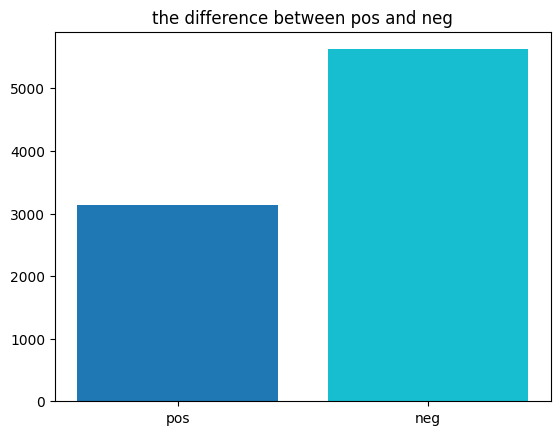

In [ ]:
words = ['pos','neg']
freq = [frequency_1 , frequency_0]
plt.bar(words,freq, color=['tab:blue', 'tab:cyan'])
plt.title('the difference between pos and neg')
plt.show()

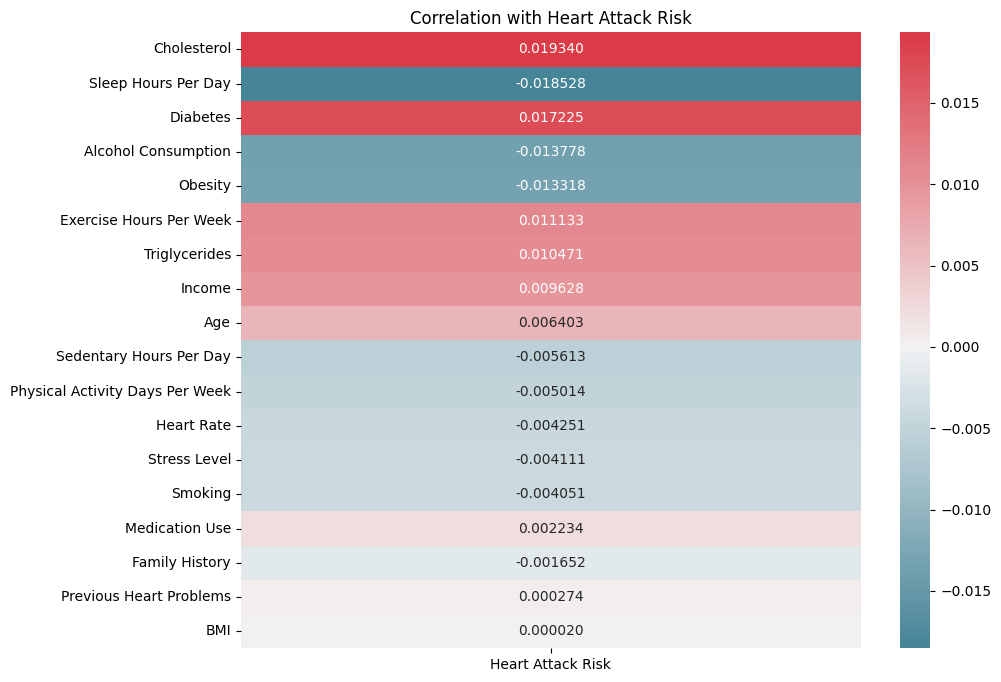

In [ ]:
# Let's create our correlation matrix
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

# Calculate correlations between all variables and 'Heart Attack Risk'
corr_to_hrisk = correlation_matrix['Heart Attack Risk']

# Sort by magnitude(we care more about impact)
corr_to_hrisk = corr_to_hrisk.drop('Heart Attack Risk')  # Remove the correlation with itself
corr_to_hrisk = corr_to_hrisk.abs().sort_values(ascending=False)

# Create our color map for both positive and negative
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(10, 8))

# Let's make our heatmap (sorted by absolute value)
sns.heatmap(
    correlation_matrix.loc[corr_to_hrisk.index, ['Heart Attack Risk']],
    annot=True,
    cmap=cmap,
    fmt=".6f",
    center=0,
)

plt.title('Correlation with Heart Attack Risk')
plt.show()

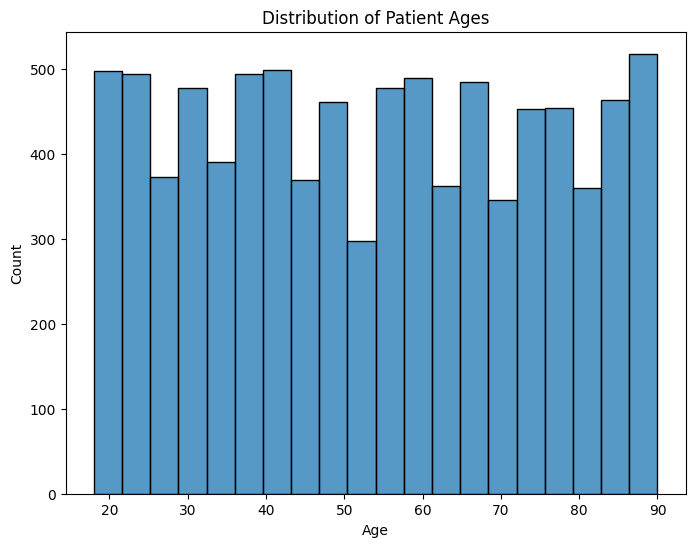

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=False)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

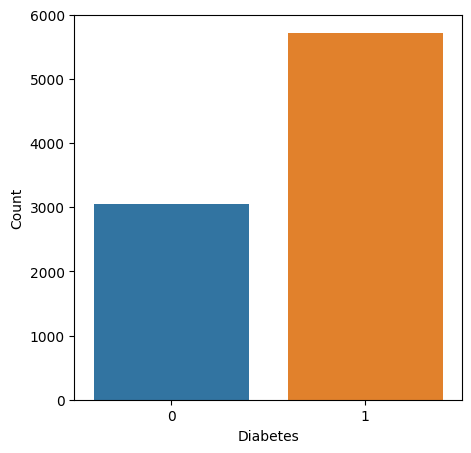

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()


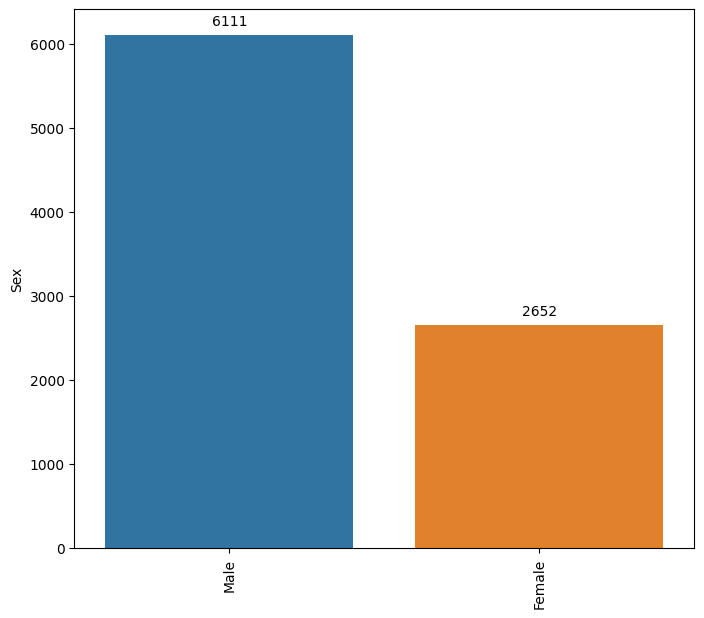

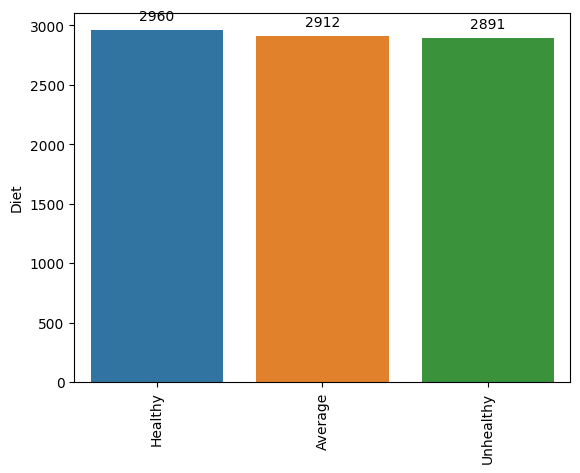

In [ ]:
ctg_data = df[['Sex','Diet']]


plt.figure(figsize=(8, 7))
for i in ctg_data.columns:
    ctg_num = ctg_data[i].value_counts()
    chart = sns.barplot(x = ctg_num.index, y = ctg_num)
    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize=10)

    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()